2024년 9월 10일 ~ 2025년 2월 13일까지의 태양 관측 결과 정리

# 1. 탐색적 데이터 확인 (EDA)

In [1]:
import os
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from astropy.io import fits

# 현재 작업 디렉토리 얻기
current_directory = os.getcwd()
print("현재 폴더 위치:", current_directory)

현재 폴더 위치: D:\astropy


In [2]:
# 폴더 지정 및 파일 목록 생성
folder_path = current_directory + '/sun'
fits_files = sorted([f for f in os.listdir(folder_path) if f.endswith('.fit')])  # 파일 정렬 추가
fits_files

['2024_09_10_15_14_07.fit',
 '2024_09_23_14_17_01.fit',
 '2024_09_24_15_03_52.fit',
 '2024_09_26_15_01_15.fit',
 '2024_09_27_16_39_49.fit',
 '2024_09_29_13_53_01.fit',
 '2024_10_02_16_28_00.fit',
 '2024_10_03_16_32_43.fit',
 '2024_10_04_13_56_01.fit',
 '2024_10_08_12_06_43.fit',
 '2024_10_11_15_04_44.fit',
 '2024_10_12_13_40_36.fit',
 '2024_10_16_13_35_18.fit',
 '2024_10_17_11_33_45.fit',
 '2024_10_20_13_24_11.fit',
 '2024_10_24_11_41_20.fit',
 '2024_11_02_15_36_08.fit',
 '2024_11_06_10_59_14.fit',
 '2024_11_10_15_04_04.fit',
 '2024_11_12_13_33_49.fit',
 '2024_11_13_13_09_38.fit',
 '2024_11_22_09_55_41.fit',
 '2024_11_23_13_23_13.fit',
 '2024_11_24_14_35_34.fit',
 '2024_12_05_10_20_24.fit',
 '2024_12_06_10_38_43.fit',
 '2024_12_07_13_17_42.fit',
 '2024_12_08_13_36_40.fit',
 '2024_12_10_14_54_35.fit',
 '2024_12_11_15_04_14.fit',
 '2024_12_12_10_40_14.fit',
 '2024_12_14_14_33_51.fit',
 '2024_12_17_13_32_15.fit',
 '2024_12_18_11_51_17.fit',
 '2024_12_24_11_39_21.fit',
 '2024_12_26_11_03_2

In [3]:
fits_files[10]

'2024_10_11_15_04_44.fit'

## 데이터 불러오기

- 예시로 24년도 10월 11일자 데이터 로드

In [4]:
# FITS 파일에서 이미지 데이터 로드
with fits.open('sun/' + fits_files[10]) as hdul:
    image_data = hdul[0].data

In [5]:
image_data.shape

(1104, 1608)

In [6]:
# 데이터 요약
min_value = np.min(image_data)
max_value = np.max(image_data)
print("Minimum Value:", min_value)
print("Maximum Value:", max_value)

Minimum Value: 0.0
Maximum Value: 49121.547


In [7]:
# 데이터 통계 요약
descriptive_stats = stats.describe(image_data.flatten())
stats_summary = {
    'Count': descriptive_stats.nobs,
    'Min': descriptive_stats.minmax[0],
    'Max': descriptive_stats.minmax[1],
    'Mean': descriptive_stats.mean,
    'Variance': descriptive_stats.variance,
    'Skewness': descriptive_stats.skewness,
    'Kurtosis': descriptive_stats.kurtosis
}

# Pandas DataFrame으로 변환
stats_df = pd.DataFrame([stats_summary])

# 결과 출력
print(stats_df)

     Count  Min           Max          Mean      Variance  Skewness  Kurtosis
0  1775232  0.0  49121.546875  16067.205078  3.561426e+08  0.500792 -1.638854


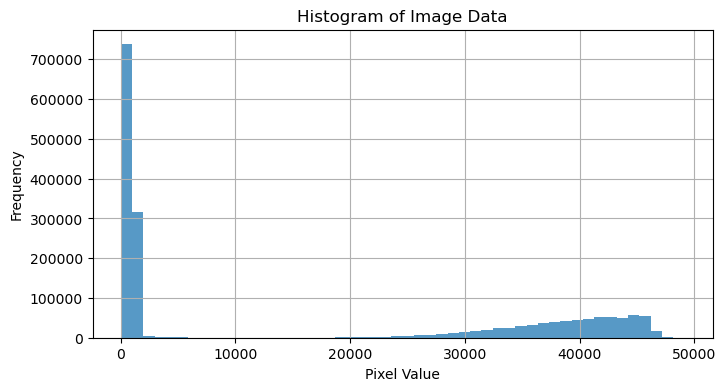

In [8]:
# 히스토그램 그리기
plt.figure(figsize=(8, 4))
plt.hist(image_data.flatten(), bins=50, color='tab:blue', alpha=0.75)
plt.title('Histogram of Image Data')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

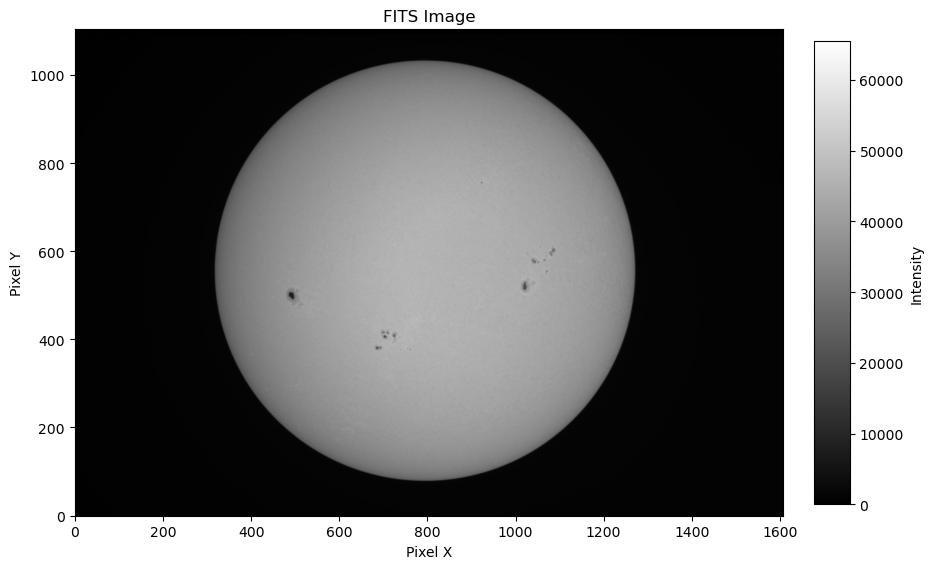

In [9]:
# 이미지 시각화
fig, ax = plt.subplots(figsize=(10, 10))
cax = ax.imshow(image_data, cmap='gray', origin='lower', vmin = 0, vmax = 2**16)
cbar = fig.colorbar(cax, ax=ax, fraction=0.046, pad=0.04, aspect=13)  # 컬러바 크기 조절
cbar.set_label('Intensity')  # 컬러바 레이블 추가
plt.title('FITS Image')
plt.xlabel('Pixel X')
plt.ylabel('Pixel Y')
plt.show()

## 일자별 데이터 기초 통계량 확인

In [10]:
# 파일 목록 읽기
fits_files = [f for f in os.listdir(folder_path) if f.endswith('.fit')]

# 통계량을 저장할 리스트
stats_list = []

# 각 FITS 파일 처리
for file in fits_files:
    with fits.open(os.path.join(folder_path, file)) as hdul:
        image_data = hdul[0].data.flatten()  # 이미지 데이터를 1D 배열로 변환
        
# 통계 요약
        descriptive_stats = stats.describe(image_data)
        data_series = pd.Series(image_data)
        quantiles = data_series.quantile([0.25, 0.5, 0.75, 0.80, 0.85, 0.90, 0.95]).to_dict()
        std_dev = np.std(image_data)  # 표준편차 계산
        stats_summary = {
            'File Name': file,
            'Count': descriptive_stats.nobs,
            'Min': descriptive_stats.minmax[0],
            'Max': descriptive_stats.minmax[1],
            'Mean': descriptive_stats.mean,
            'Variance': descriptive_stats.variance,
            'Standard Deviation': std_dev,  # 표준편차 추가
            'Skewness': descriptive_stats.skewness,
            'Kurtosis': descriptive_stats.kurtosis,
            '25%': quantiles[0.25],
            'Median': quantiles[0.5],
            '75%': quantiles[0.75],
            '80%': quantiles[0.80],
            '85%': quantiles[0.85],
            '90%': quantiles[0.90],
            '95%': quantiles[0.95]
        }
        stats_list.append(stats_summary)

# 결과를 DataFrame으로 변환
stats_df = pd.DataFrame(stats_list)

# DataFrame 출력
# print(stats_df)

# DataFrame을 CSV 파일로 저장
stats_df.to_csv('sun_stats/FITS_Statistics.csv', index=False)

In [11]:
import pandas as pd

# Pandas 소수점 형식 설정: 소수점 둘째 자리까지
pd.set_option('display.float_format', '{:.2f}'.format)

# 설정 되돌리고 싶을 때
# pd.reset_option('display.float_format')

stats_df

,File Name,Count,Min,Max,Mean,Variance,Standard Deviation,Skewness,Kurtosis,25%,Median,75%,80%,85%,90%,95%
0,2024_09_10_15_14_07.fit,1775232,0.00,57282.90,17723.17,453331839.36,21291.58,0.56,-1.54,833.04,1142.68,41283.63,44161.58,46884.09,49621.71,52216.75
1,2024_09_23_14_17_01.fit,1775232,0.00,63541.08,20599.79,605321044.98,24603.27,0.52,-1.61,883.17,1196.35,48589.17,51440.62,54106.24,56572.65,58845.53
2,2024_09_24_15_03_52.fit,1775232,0.00,54305.68,17418.21,433657556.28,20824.44,0.54,-1.57,786.88,1066.91,40746.25,43434.79,45891.96,48272.86,50452.67
3,2024_09_26_15_01_15.fit,1775232,0.00,50411.96,16464.52,382316983.36,19552.92,0.53,-1.59,810.62,1083.26,38572.41,41048.71,43244.96,45286.22,47101.32
4,2024_09_27_16_39_49.fit,1775232,0.00,49219.59,16079.29,369198575.97,19214.54,0.53,-1.59,722.84,983.36,37677.54,40116.24,42357.34,44431.12,46376.96
5,2024_09_29_13_53_01.fit,1775232,0.00,44864.73,14026.11,278236412.73,16680.42,0.57,-1.51,728.61,1007.85,32067.89,34459.80,36742.17,39086.30,41447.47
6,2024_10_02_16_28_00.fit,1775232,0.00,46520.48,15209.57,324809878.97,18022.48,0.52,-1.61,773.42,1016.80,35839.91,37970.90,39828.49,41514.86,43109.07
7,2024_10_03_16_32_43.fit,1775232,0.00,56157.06,17613.50,437754070.59,20922.57,0.52,-1.60,823.00,1090.10,41370.73,43950.06,46241.94,48293.67,50201.07
8,2024_10_04_13_56_01.fit,1775232,0.00,53082.57,14740.40,301875722.05,17374.57,0.51,-1.63,770.15,986.09,34625.88,36728.10,38518.39,40075.20,41352.68
9,2024_10_08_12_06_43.fit,1775232,0.00,50581.25,16606.08,384008472.31,19596.13,0.50,-1.64,811.63,1084.77,39036.02,41312.91,43329.48,45077.71,46576.30


## Subplot으로 48개 데이터 한 번에 시각화하기

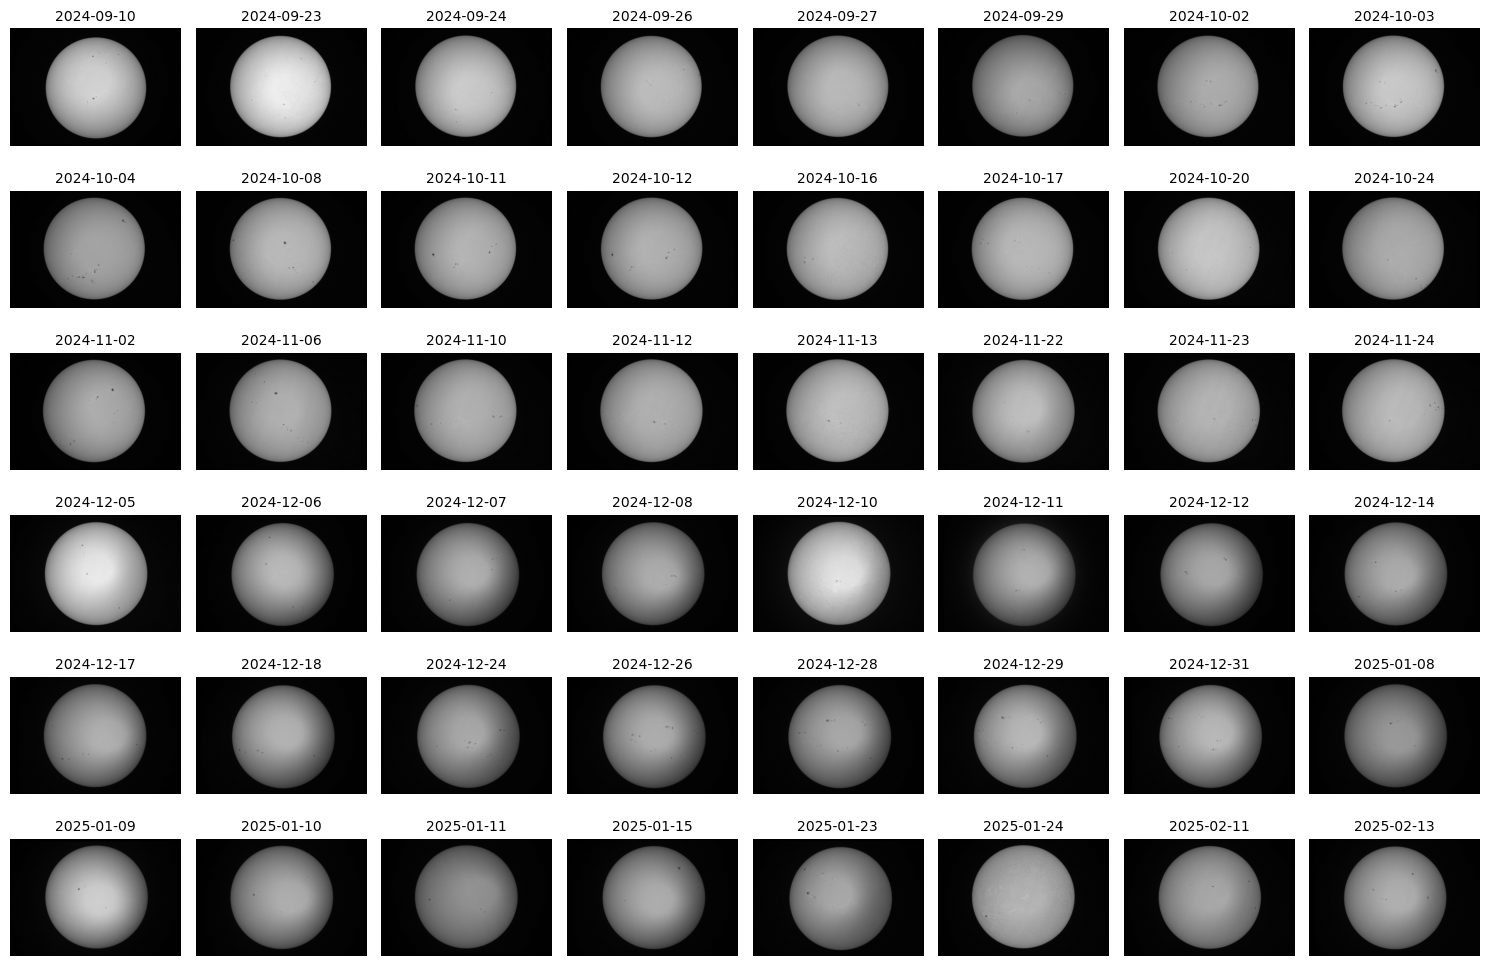

In [12]:
# Subplot 설정
fig, axes = plt.subplots(nrows=6, ncols=8, figsize=(15, 10))
axes = axes.flatten()  # 2D 배열을 1D 배열로 변환

for i, file in enumerate(fits_files):
    if i >= 48:  # 48개 파일만 처리
        break
    # FITS 파일에서 이미지 데이터 읽기
    with fits.open(os.path.join(folder_path, file)) as hdul:
        image_data = hdul[0].data

    # 파일명에서 날짜 정보 추출
    date_parts = file.split('_')  # 파일명을 '_' 기준으로 분리
    date_title = f"{date_parts[0]}-{date_parts[1]}-{date_parts[2]}"  # 연-월-일 형식

    # 축에 이미지 그리기
    ax = axes[i]
    # ax.imshow(image_data, cmap='gray', vmin=image_data.mean() - 0.5 * image_data.std(), vmax=image_data.mean() + 2 * image_data.std())  # 밝기 조절
    ax.imshow(image_data, cmap='gray', origin = 'lower', vmin = 0, vmax = 2**16)  # 데이터 센싱 범위 0 ~ 65536 범위 내에서 plot
    # ax.imshow(image_data, cmap='gray')  # 밝기 조절
    ax.axis('off')  # 축 레이블 제거
    ax.set_title(date_title, fontsize=10)  # 추출한 날짜로 제목 설정

# 빈 subplot 공간 숨기기
for ax in axes[len(fits_files):]:
    ax.axis('off')

# 전체 그래프 보여주기 및 파일로 저장
plt.tight_layout()
plt.savefig('Sun_Observations1.png')  # 파일로 저장
plt.show()


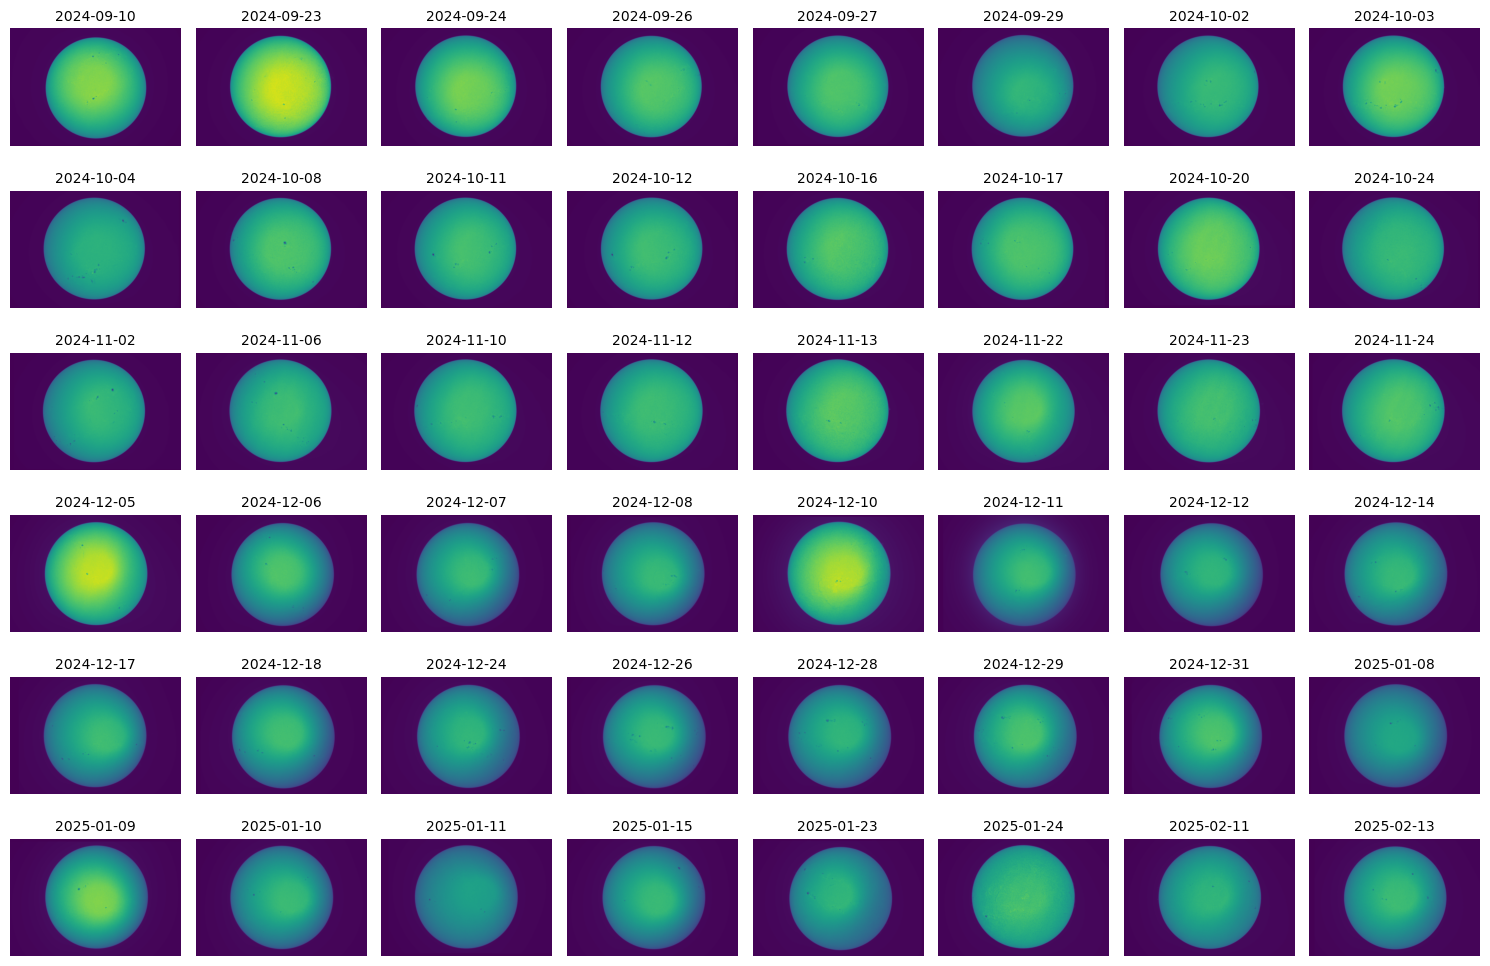

In [13]:
# viridis 버전

# Subplot 설정 
fig, axes = plt.subplots(nrows=6, ncols=8, figsize=(15, 10))
axes = axes.flatten()  # 2D 배열을 1D 배열로 변환

for i, file in enumerate(fits_files):

    '''
    if i >= 48:  # 48개 파일만 처리
        break
    '''
    
    # FITS 파일에서 이미지 데이터 읽기
    with fits.open(os.path.join(folder_path, file)) as hdul:
        image_data = hdul[0].data

    # 파일명에서 날짜 정보 추출
    date_parts = file.split('_')  # 파일명을 '_' 기준으로 분리
    date_title = f"{date_parts[0]}-{date_parts[1]}-{date_parts[2]}"  # 연-월-일 형식

    # 축에 이미지 그리기
    ax = axes[i]
    # ax.imshow(image_data, cmap='viridis') 
    ax.imshow(image_data, cmap='viridis', origin = 'lower', vmin = 0, vmax = 2**16)  # 데이터 센싱 범위 0 ~ 65536 범위 내에서 plot
    ax.axis('off')  # 축 레이블 제거
    ax.set_title(date_title, fontsize=10)  # 추출한 날짜로 제목 설정

# 빈 subplot 공간 숨기기
for ax in axes[len(fits_files):]:
    ax.axis('off')

# 전체 그래프 보여주기 및 파일로 저장
plt.tight_layout()
plt.savefig('Sun_Observations_viridis.png')  # 파일로 저장
plt.show()


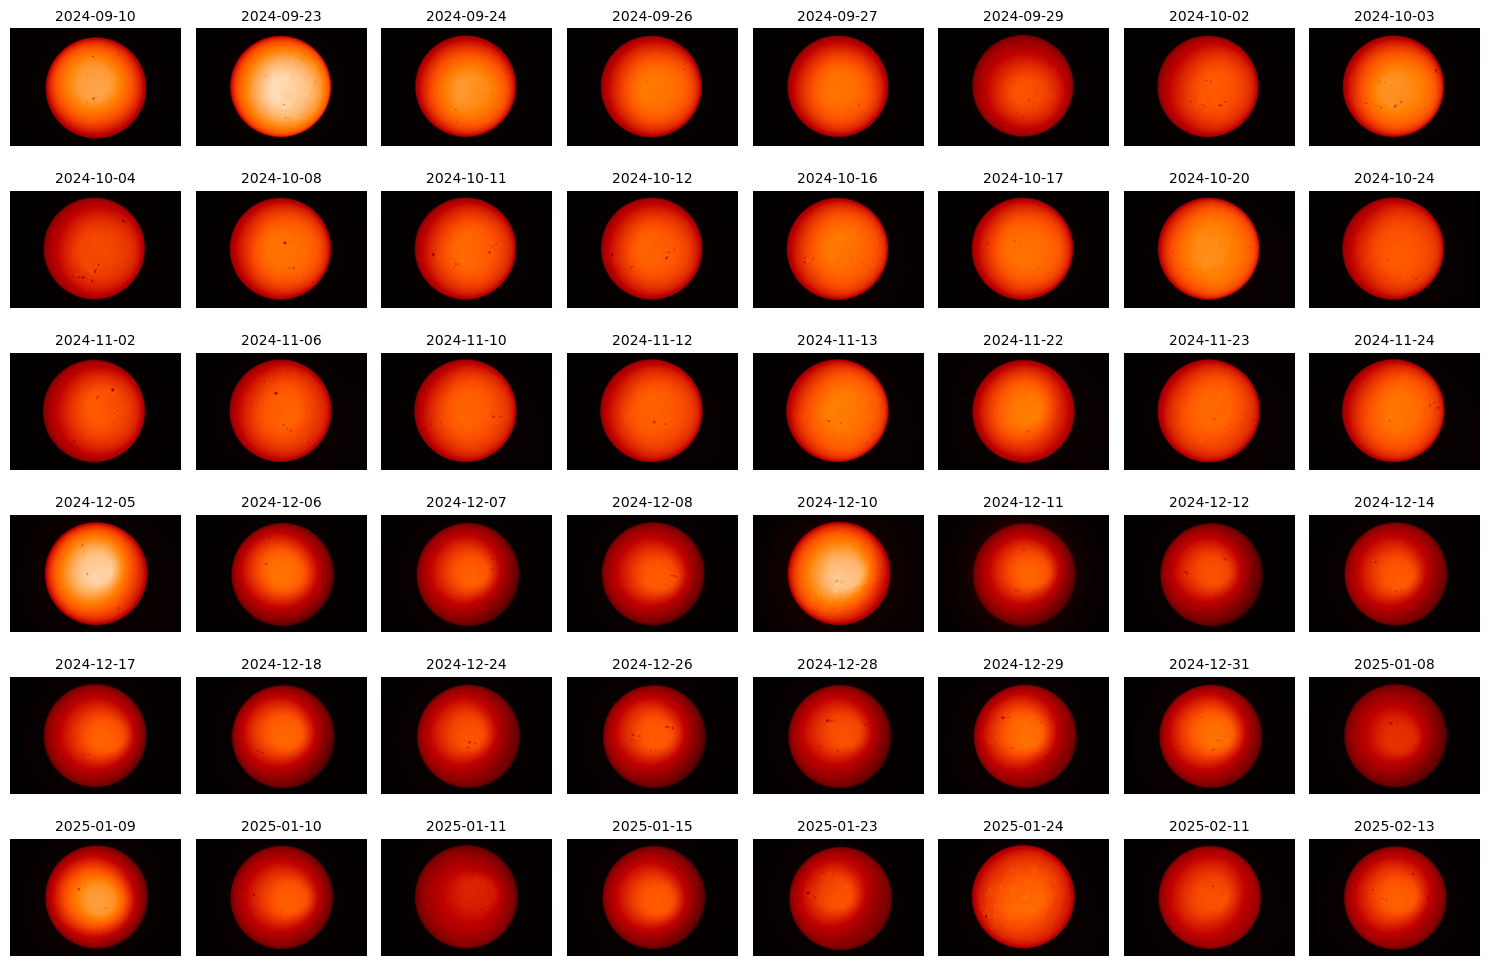

In [14]:
# gist_heat 버전

# Subplot 설정 
fig, axes = plt.subplots(nrows=6, ncols=8, figsize=(15, 10))
axes = axes.flatten()  # 2D 배열을 1D 배열로 변환

for i, file in enumerate(fits_files):

    '''
    if i >= 48:  # 48개 파일만 처리
        break
    '''
    
    # FITS 파일에서 이미지 데이터 읽기
    with fits.open(os.path.join(folder_path, file)) as hdul:
        image_data = hdul[0].data

    # 파일명에서 날짜 정보 추출
    date_parts = file.split('_')  # 파일명을 '_' 기준으로 분리
    date_title = f"{date_parts[0]}-{date_parts[1]}-{date_parts[2]}"  # 연-월-일 형식

    # 축에 이미지 그리기
    ax = axes[i]
    # ax.imshow(image_data, cmap='viridis') 
    ax.imshow(image_data, cmap='gist_heat', origin = 'lower', vmin = 0, vmax = 2**16)  # 데이터 센싱 범위 0 ~ 65536 범위 내에서 plot
    ax.axis('off')  # 축 레이블 제거
    ax.set_title(date_title, fontsize=10)  # 추출한 날짜로 제목 설정

# 빈 subplot 공간 숨기기
for ax in axes[len(fits_files):]:
    ax.axis('off')

# 전체 그래프 보여주기 및 파일로 저장
plt.tight_layout()
plt.savefig('Sun_Observations_gist.png')  # 파일로 저장
plt.show()


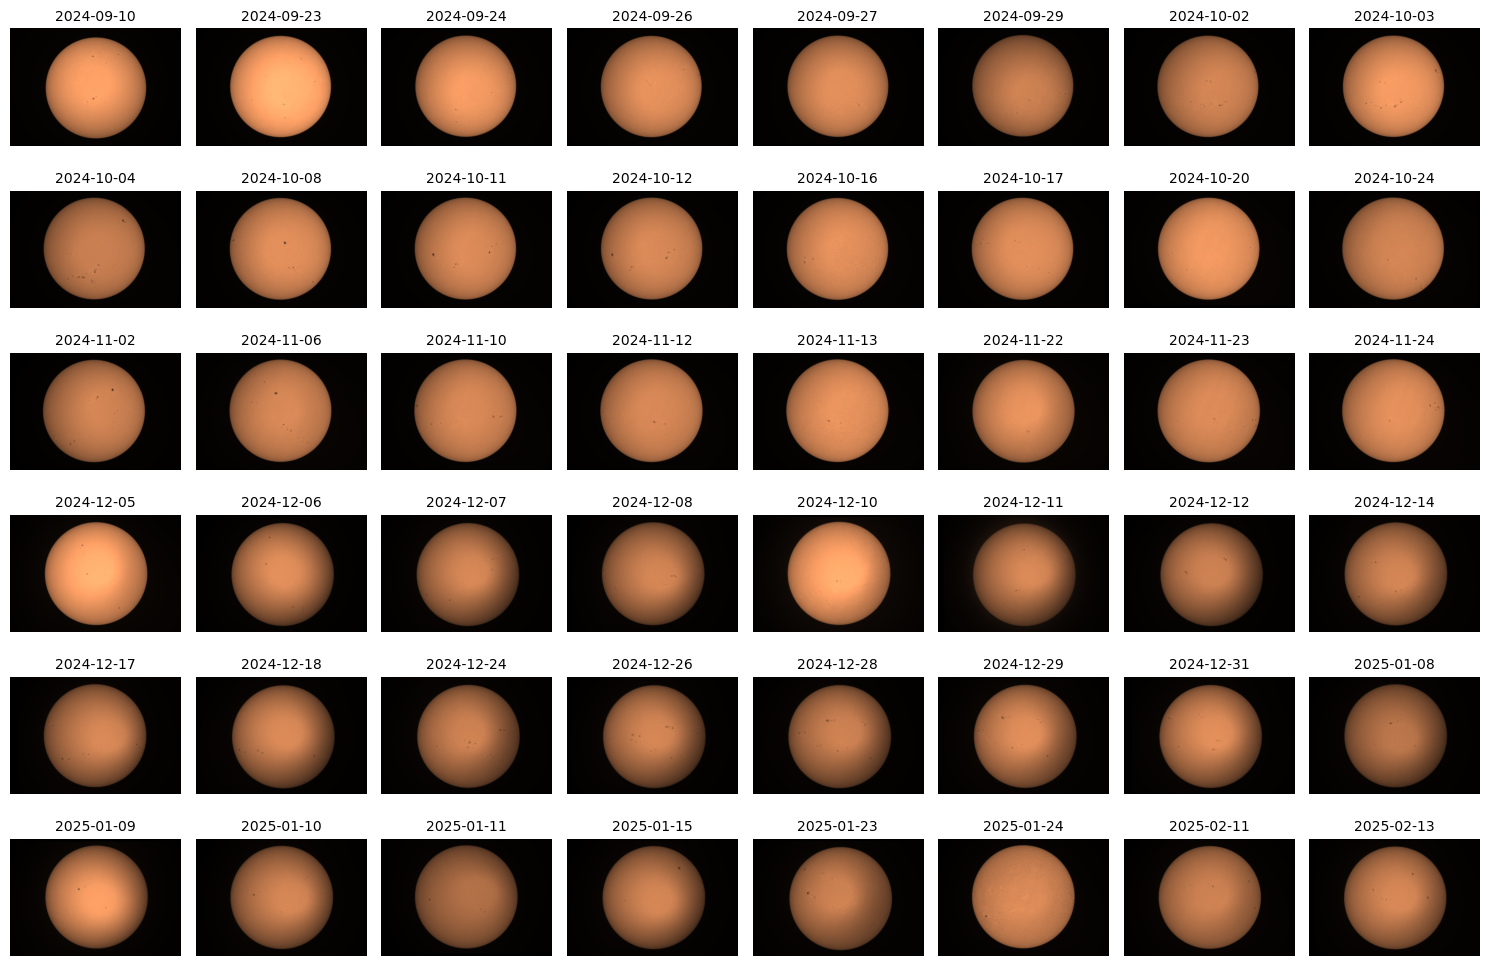

In [15]:
# copper 버전

# Subplot 설정 
fig, axes = plt.subplots(nrows=6, ncols=8, figsize=(15, 10))
axes = axes.flatten()  # 2D 배열을 1D 배열로 변환

for i, file in enumerate(fits_files):

    '''
    if i >= 48:  # 48개 파일만 처리
        break
    '''
    
    # FITS 파일에서 이미지 데이터 읽기
    with fits.open(os.path.join(folder_path, file)) as hdul:
        image_data = hdul[0].data

    # 파일명에서 날짜 정보 추출
    date_parts = file.split('_')  # 파일명을 '_' 기준으로 분리
    date_title = f"{date_parts[0]}-{date_parts[1]}-{date_parts[2]}"  # 연-월-일 형식

    # 축에 이미지 그리기
    ax = axes[i]
    # ax.imshow(image_data, cmap='viridis') 
    ax.imshow(image_data, cmap='copper', origin = 'lower', vmin = 0, vmax = 2**16)  # 데이터 센싱 범위 0 ~ 65536 범위 내에서 plot
    ax.axis('off')  # 축 레이블 제거
    ax.set_title(date_title, fontsize=10)  # 추출한 날짜로 제목 설정

# 빈 subplot 공간 숨기기
for ax in axes[len(fits_files):]:
    ax.axis('off')

# 전체 그래프 보여주기 및 파일로 저장
plt.tight_layout()
plt.savefig('Sun_Observations_copper.png')  # 파일로 저장
plt.show()


## 각각의 데이터별 히스토그램 그리기

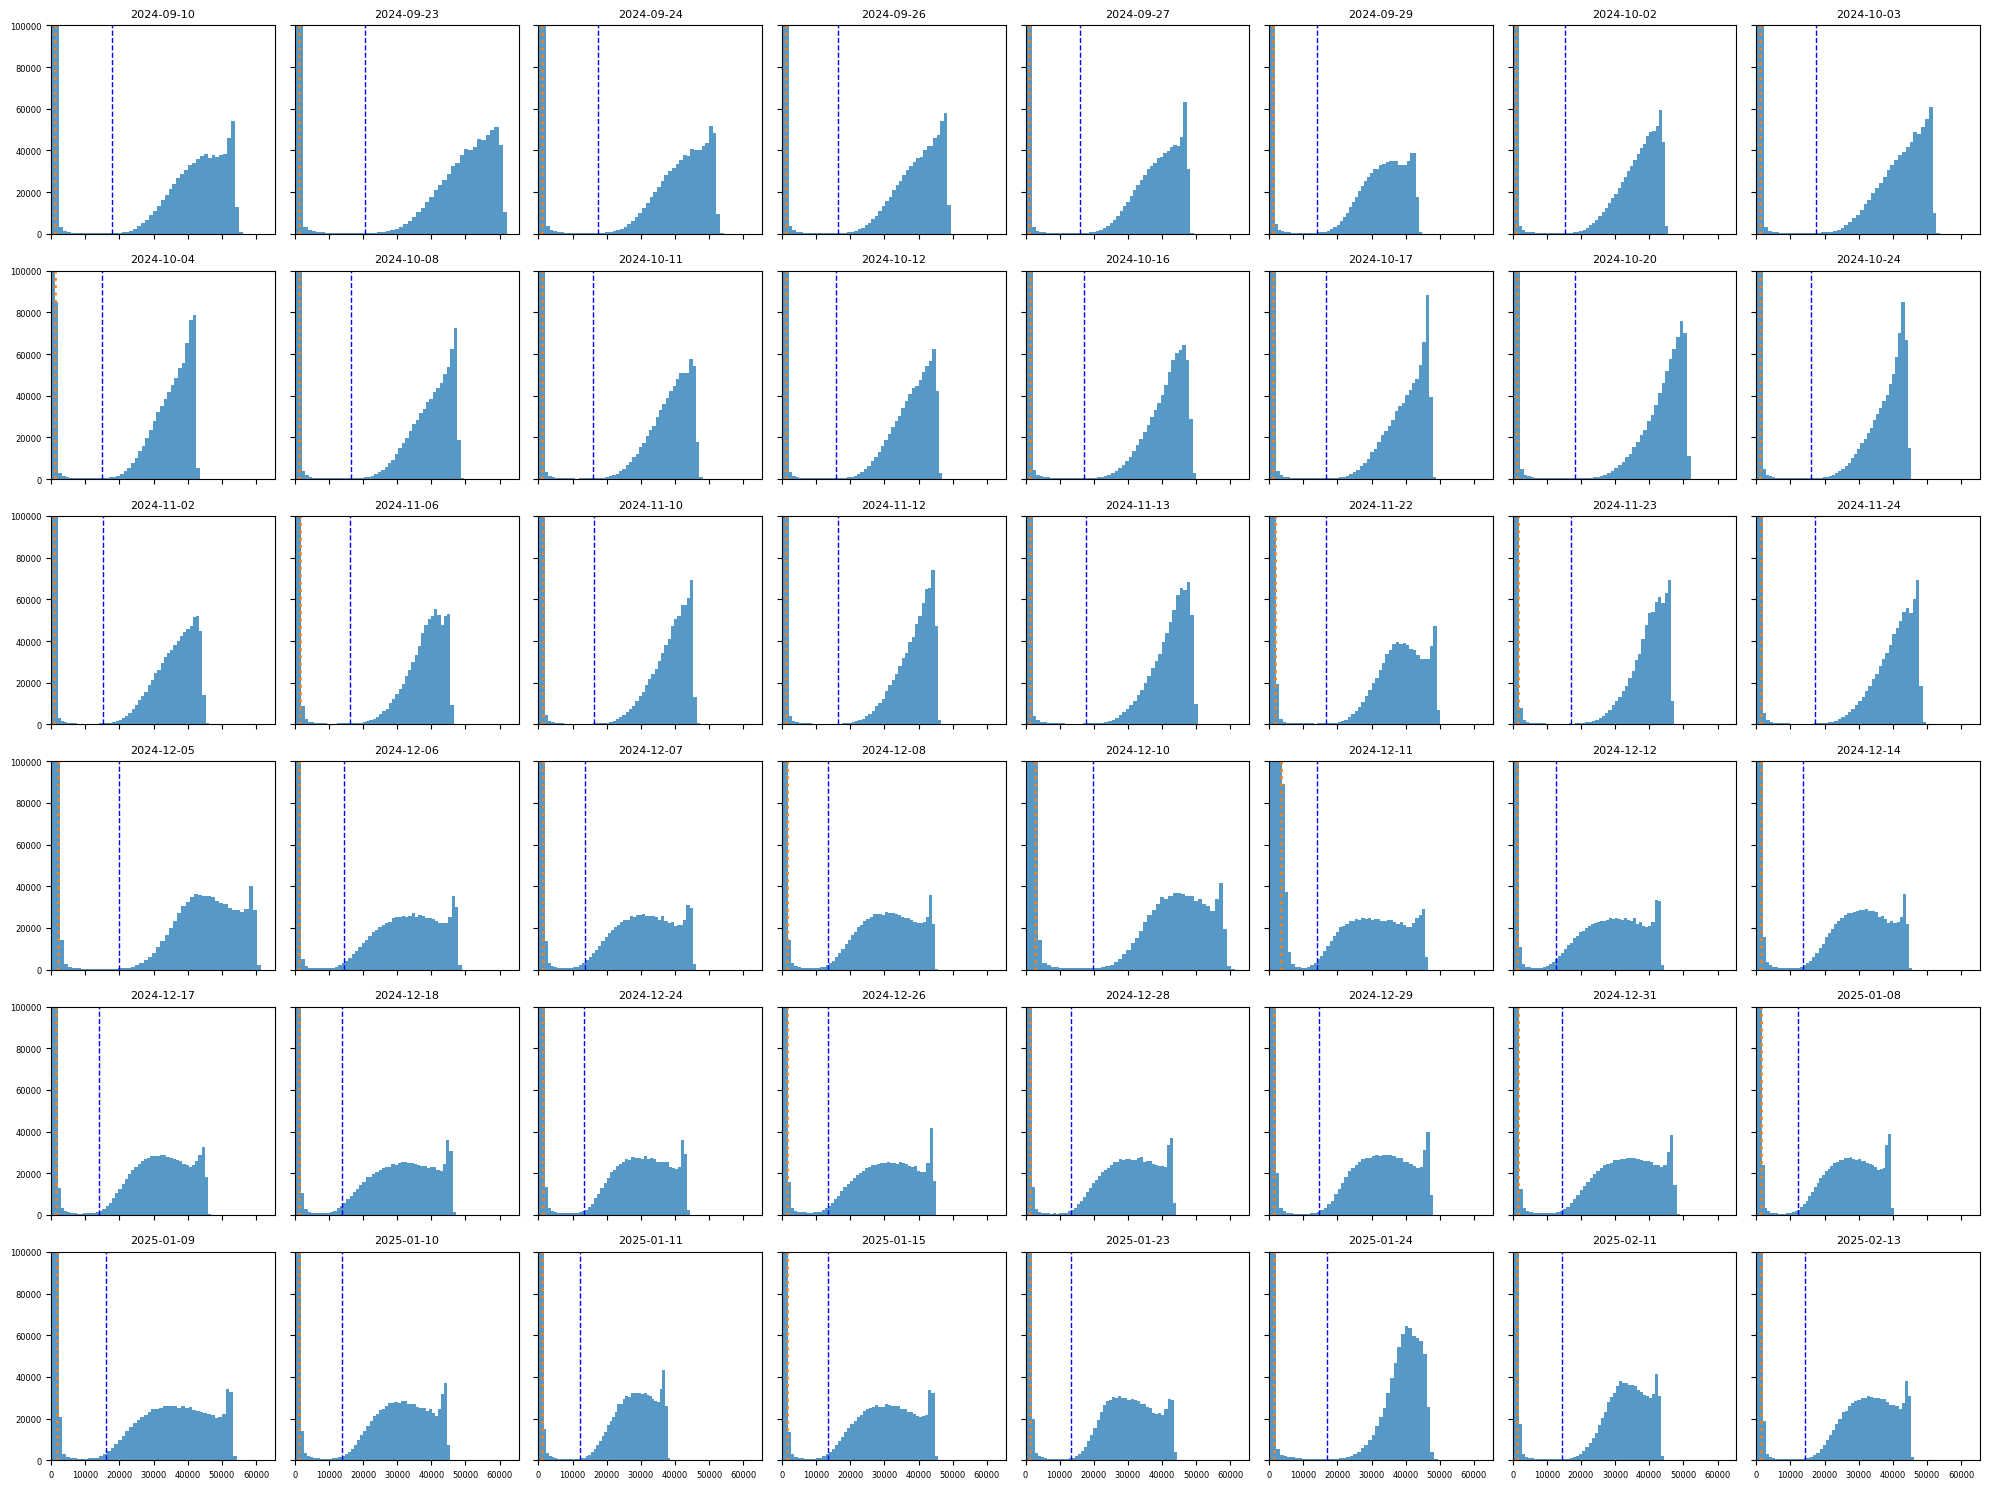

In [16]:
# 파일 목록 읽기
fits_files = [f for f in os.listdir(folder_path) if f.endswith('.fit')]
fits_files = sorted(fits_files)[:48]  # 최대 48개 파일만 처리

# Subplot 설정
fig, axes = plt.subplots(nrows=6, ncols=8, figsize=(20, 15), tight_layout=True)

# 각 FITS 파일 처리
for ax, file in zip(axes.flatten(), fits_files):
    with fits.open(os.path.join(folder_path, file)) as hdul:
        image_data = hdul[0].data.flatten()  # 이미지 데이터를 1D 배열로 변환

    # 파일명에서 날짜 정보 추출
    date_parts = file.split('_')  # 파일명을 '_' 기준으로 분리
    date_title = f"{date_parts[0]}-{date_parts[1]}-{date_parts[2]}"  # 연-월-일 형식
        
    # 히스토그램 그리기
    ax.hist(image_data, bins=50, color='tab:blue', alpha=0.75)
    ax.set_ylim([0, 100000])  # y축 범위 설정
    ax.set_xlim([0, 65536])  # x축 범위 설정
    ax.set_title(date_title, fontsize=8)  # 파일 이름으로 제목 설정, 폰트 크기 조정
    ax.tick_params(labelsize=6)  # 눈금 레이블 크기 조정

    # 평균과 중앙값 계산
    mean_value = np.mean(image_data)
    median_value = np.median(image_data)
    
    # 평균선 추가
    ax.axvline(mean_value, color='blue', linestyle='dashed', linewidth=1)
    # 중앙값 선 추가
    ax.axvline(median_value, color='tab:orange', linestyle='dotted', linewidth=2)

# 각 축의 레이블 숨기기
for ax in fig.axes:
    ax.label_outer()

# 전체 그래프 보여주기 및 파일로 저장
plt.tight_layout()
plt.savefig('Sun_Obs_hist.png')  # 파일로 저장
plt.show()

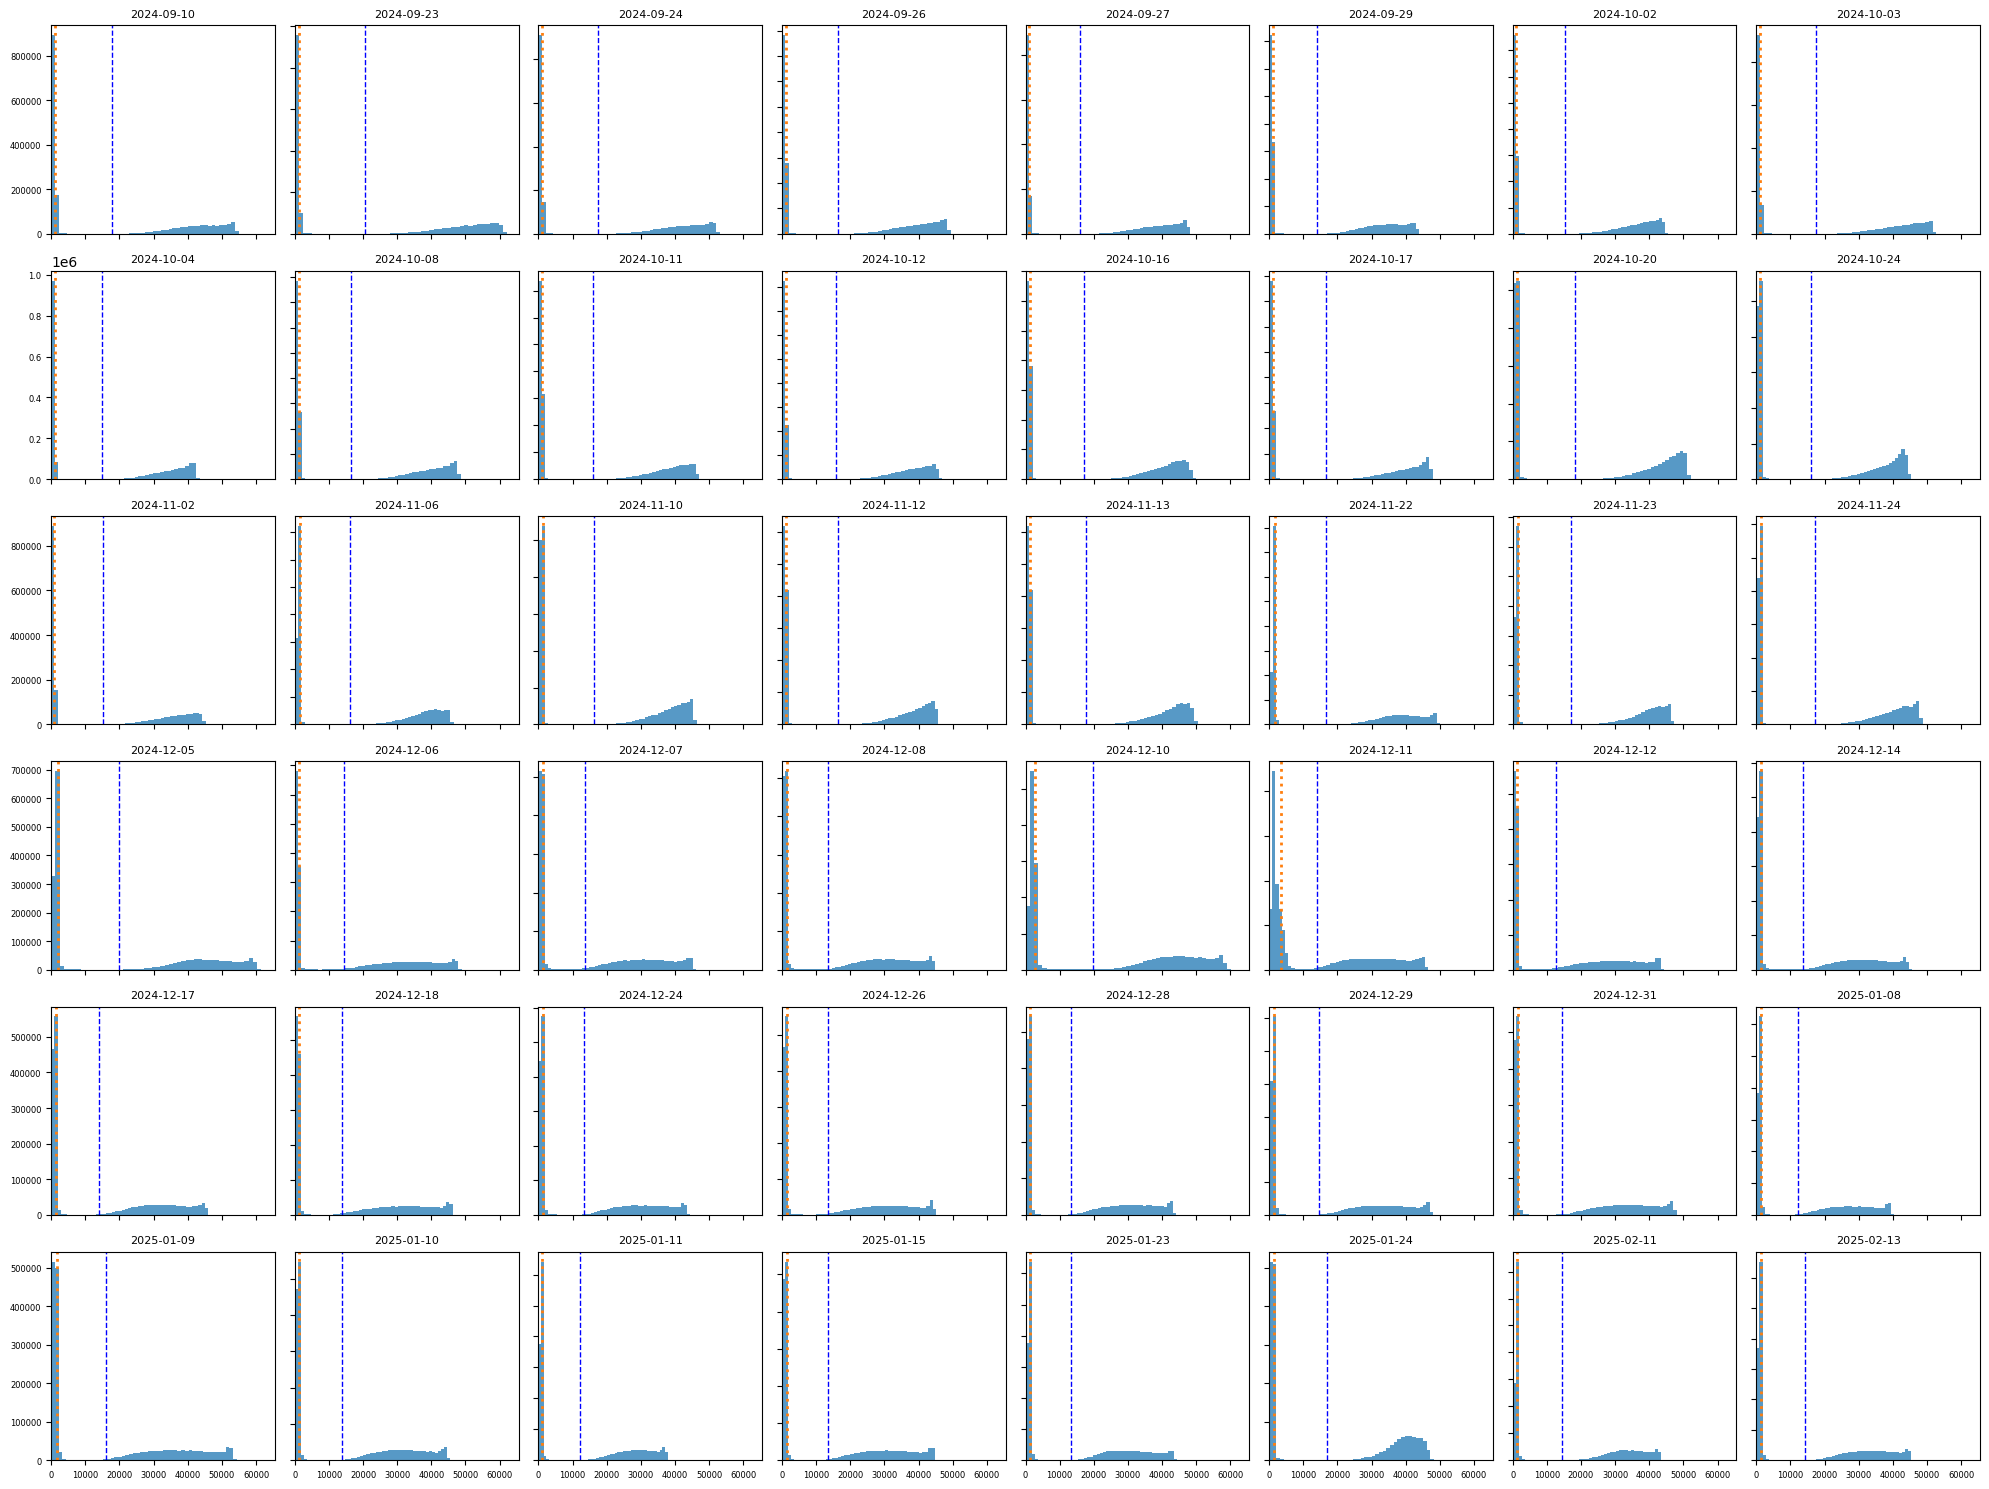

In [17]:
# y-lim 없이 히스토그램 생성

# Subplot 설정
fig, axes = plt.subplots(nrows=6, ncols=8, figsize=(20, 15), tight_layout=True)

# 각 FITS 파일 처리
for ax, file in zip(axes.flatten(), fits_files):
    with fits.open(os.path.join(folder_path, file)) as hdul:
        image_data = hdul[0].data.flatten()  # 이미지 데이터를 1D 배열로 변환

    # 파일명에서 날짜 정보 추출
    date_parts = file.split('_')  # 파일명을 '_' 기준으로 분리
    date_title = f"{date_parts[0]}-{date_parts[1]}-{date_parts[2]}"  # 연-월-일 형식
        
    # 히스토그램 그리기
    ax.hist(image_data, bins=50, color='tab:blue', alpha=0.75)
    ax.set_ylim()  # y축 범위 설정
    ax.set_xlim([0, 65536])  # x축 범위 설정
    ax.set_title(date_title, fontsize=8)  # 파일 이름으로 제목 설정, 폰트 크기 조정
    ax.tick_params(labelsize=6)  # 눈금 레이블 크기 조정

    # 평균과 중앙값 계산
    mean_value = np.mean(image_data)
    median_value = np.median(image_data)
    
    # 평균선 추가
    ax.axvline(mean_value, color='blue', linestyle='dashed', linewidth=1)
    # 중앙값 선 추가
    ax.axvline(median_value, color='tab:orange', linestyle='dotted', linewidth=2)

# 각 축의 레이블 숨기기
for ax in fig.axes:
    ax.label_outer()

# 전체 그래프 보여주기 및 파일로 저장
plt.tight_layout()
plt.savefig('Sun_Obs_hist_non_limit.png')  # 파일로 저장
plt.show()

- 정규화 여부 검토 필요

## 파일 이름에서 촬영 일시 추출

In [18]:
import pandas as pd
import copy

# 파일 이름 리스트
file_names = copy.deepcopy(fits_files)

# Pandas Series 객체 생성
file_names_sr = pd.Series(file_names)
file_series = pd.Series(file_names)

# '.fit' 확장자 제거 및 '_'를 적절한 구분자로 변경
file_series = file_series.str.replace('.fit', '')  # '.fit' 제거
file_series = file_series.str.replace('_', '-', 2)  # 첫 번째 '_'를 공백으로 변경
file_series = file_series.str.replace('_', ' ', 1)  # 다음 두 개의 '_'를 '-'로 변경
file_series = file_series.str.replace('_', ':', 2)  # 나머지 두 개의 '_'를 ':'로 변경
file_series[0]

'2024-09-10 15:14:07'

In [19]:
# 문자열을 datetime 객체로 변환
fits_datetimes = pd.to_datetime(file_series, format='%Y-%m-%d %H:%M:%S')

# 원하는 형식으로 날짜-시간 포맷 변경
kst_dates = fits_datetimes.dt.strftime('%Y-%m-%d %H:%M')

# 결과 출력
kst_dates[0]

'2024-09-10 15:14'

In [20]:
from datetime import timedelta

# UTC 시간으로 변환하기 위해 9시간 빼기
utc_datetimes = fits_datetimes - timedelta(hours=9)
utc_datetimes

# 다시 날짜-시간 포맷 변경
utc_dates = utc_datetimes.dt.strftime('%Y-%m-%d %H:%M')

# 결과 출력
utc_dates[0:5]

0    2024-09-10 06:14
1    2024-09-23 05:17
2    2024-09-24 06:03
3    2024-09-26 06:01
4    2024-09-27 07:39
dtype: object

In [21]:
# 파일 이름, fits 촬영일시, KST 일자, UTC 일자에 대한 데이터 프레임 생성

fits_times_df = pd.concat([file_names_sr, fits_datetimes, kst_dates, utc_dates], axis = 1)
fits_times_df.columns = ['file_name', 'fits_datetimes', 'KST_times', 'UTC_times']
fits_times_df.to_csv('sun_stats/fits_datetimes.csv', index=False)

fits_times_df.head()

,file_name,fits_datetimes,KST_times,UTC_times
0,2024_09_10_15_14_07.fit,2024-09-10 15:14:07,2024-09-10 15:14,2024-09-10 06:14
1,2024_09_23_14_17_01.fit,2024-09-23 14:17:01,2024-09-23 14:17,2024-09-23 05:17
2,2024_09_24_15_03_52.fit,2024-09-24 15:03:52,2024-09-24 15:03,2024-09-24 06:03
3,2024_09_26_15_01_15.fit,2024-09-26 15:01:15,2024-09-26 15:01,2024-09-26 06:01
4,2024_09_27_16_39_49.fit,2024-09-27 16:39:49,2024-09-27 16:39,2024-09-27 07:39


# 2. 이미지 흑점 추출 및 카운트

In [22]:
fits_times_df.iloc[0,:]

file_name         2024_09_10_15_14_07.fit
fits_datetimes        2024-09-10 15:14:07
KST_times                2024-09-10 15:14
UTC_times                2024-09-10 06:14
Name: 0, dtype: object

## 2.1 필요 함수 준비

### 2.1.1 skimage 활용 흑점 검출

In [23]:
# 1. skimage 활용 흑점 검출

import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from skimage import filters, measure, morphology

def detect_sunspots_skimage(fits_file, output_path, visualize=False):
    # FITS 파일에서 이미지 데이터 로드
    with fits.open('sun/' + fits_file) as hdul:
        image_data = hdul[0].data

    # 이미지 전처리: 명암 대비 강화
    image_data = image_data.astype(np.float64)
    vmin = image_data.mean() - 1 * image_data.std()
    vmax = image_data.mean() + 2 * image_data.std()
    image_data_normalized = np.clip((image_data - vmin) / (vmax - vmin), 0, 1)

    # 흑점 감지를 위한 임계값 설정
    threshold_value = filters.threshold_otsu(image_data_normalized)
    mask = image_data_normalized < threshold_value  # 어두운 영역 마스크 생성

    # 노이즈 제거 및 객체 분리
    cleaned_mask = morphology.remove_small_objects(mask, min_size=10)  # 작은 객체 제거
    cleaned_mask = morphology.opening(cleaned_mask, morphology.disk(3))  # 열림 연산으로 객체 분리

    # 흑점 카운트
    labels = measure.label(cleaned_mask)  # 연결된 객체 레이블링
    sunspot_count = labels.max()  # 최대 레이블 번호 = 흑점 개수

    # 결과 출력
    print(f"Detected sunspots using skimage: {sunspot_count-1}")

    # 이미지와 흑점 감지 결과 시각화 및 파일 저장
    fig, ax = plt.subplots(1, 2, figsize=(14, 7))
    ax[0].imshow(image_data_normalized, cmap='gray', origin='lower')
    ax[0].set_title('Original Image')
    ax[1].imshow(cleaned_mask, cmap='copper_r', origin='lower')
    ax[1].set_title('Detected Sunspots by Skimage')

    # 결과 이미지를 PNG 파일로 저장
    plt.savefig(output_path)

    # 선택적으로 화면에 시각화 결과 보여주기
    if visualize:
        plt.show()
    plt.close(fig)  # 화면에 표시하지 않고 닫기

    return sunspot_count - 1


In [24]:
# 테스트 코드

detect_sunspots_skimage(fits_files[0], '2024-09-10_skimage.png', False)

Detected sunspots using skimage: 1


1

### 2.1.2 opencv 활용 흑점 검출

In [25]:
# 2. opencv 활용 흑점 검출

import cv2
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

def detect_sunspots_opencv(fits_file, output_path, visualize=False):
    # FITS 파일에서 이미지 데이터 로드
    with fits.open('sun/' + fits_file) as hdul:
        image_data = hdul[0].data

    # 이미지 전처리: 명암 대비 강화
    image_data = image_data.astype(np.float64)
    vmin = image_data.mean() - 1 * image_data.std()
    vmax = image_data.mean() + 2 * image_data.std()
    image_data_normalized = np.clip((image_data - vmin) / (vmax - vmin), 0, 1)
    image_data_normalized = (image_data_normalized * 255).astype(np.uint8)  # OpenCV 작업을 위해 스케일 조정 및 uint8로 변환

    # 흑점 감지를 위한 임계값 설정
    _, thresholded = cv2.threshold(image_data_normalized, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # 노이즈 제거 및 객체 분리
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    opened = cv2.morphologyEx(thresholded, cv2.MORPH_OPEN, kernel)  # 열림 연산
    cleaned_mask = cv2.morphologyEx(opened, cv2.MORPH_CLOSE, kernel)  # 닫힘 연산으로 더욱 정제

    # 흑점 카운트
    num_labels, labels_im = cv2.connectedComponents(cleaned_mask)

    # 결과 출력
    print(f"Detected sunspots using opencv: {num_labels - 2}")  # 배경 레이블 및 태양 원 레이블 제외

    # 이미지와 흑점 감지 결과 시각화 및 파일 저장
    fig, ax = plt.subplots(1, 2, figsize=(14, 7))
    ax[0].imshow(image_data_normalized, cmap='gray', origin='lower')
    ax[0].set_title('Original Image')
    ax[1].imshow(cleaned_mask, cmap='copper_r', origin='lower')
    ax[1].set_title('Detected Sunspots by OpenCV')

    # 결과 이미지를 PNG 파일로 저장
    plt.savefig(output_path)
    
    # 선택적으로 화면에 시각화 결과 보여주기
    if visualize:
        plt.show()
    plt.close(fig)  # 화면에 표시하지 않고 닫기

    return num_labels - 2 

In [26]:
# 테스트 코드

detect_sunspots_opencv(fits_files[0], '2024-09-10_opencv.png', False)

Detected sunspots using opencv: 3


3

### 2.1.3 Canny Edge 검출기 활용 흑점 검출

In [27]:
# 3. Canny Edge 검출기 활용 흑점 검출

import numpy as np
import cv2
import matplotlib.pyplot as plt
from astropy.io import fits

def detect_sunspots_CannyEdge(fits_file, output_folder, visualize=False):
    # FITS 파일에서 이미지 데이터 로드
    with fits.open('sun/' + fits_file) as hdul:
        image_data = hdul[0].data

    # 데이터를 0에서 1 사이로 정규화하기 전에 백분위 수를 사용하여 값 조정
    vmin, vmax = np.percentile(image_data, [1, 99])  # 1%와 99% 백분위 수
    image_data_clipped = np.clip(image_data, vmin, vmax)
    image_normalized = (image_data_clipped - vmin) / (vmax - vmin)

    # OpenCV를 사용하여 이미지를 0에서 255 사이로 스케일링
    image_scaled = (image_normalized * 255).astype(np.uint8)

    # Canny 엣지 검출기를 사용하여 엣지 검출
    edges = cv2.Canny(image_scaled, 50, 150)  # 임계값 조정 필요

    # 엣지로 마스크 생성 (엣지는 255, 그 외는 0)
    mask = np.zeros_like(image_scaled)
    mask[edges > 0] = 255

    # 원본 데이터에 마스크 적용 (엣지 외부를 0으로 설정)
    masked_image = np.where(mask == 255, image_scaled, 0)

    # 결과 이미지 저장 및 표시
    fig, ax = plt.subplots(1, 2, figsize=(14, 7))
    ax[0].imshow(image_scaled, cmap='gray', origin='lower')
    ax[0].set_title('Scaled Image')
    ax[1].imshow(edges, cmap='copper_r', origin='lower')
    ax[1].set_title('Edges Detected')
    # ax[2].imshow(masked_image, cmap='copper_r', origin='lower')
    # ax[2].set_title('Masked Image')
    plt.savefig(f'{output_folder}/combined_images_Canny.png')

    # 선택적으로 화면에 시각화 결과 보여주기
    if visualize:
        plt.show()
    plt.close(fig)  # 화면에 표시하지 않고 닫기

    # 각 이미지 따로 저장
    plt.imsave(f'{output_folder}/scaled_image.png', image_scaled, cmap='gray', origin='lower')
    plt.imsave(f'{output_folder}/edges_detected.png', edges, cmap='copper_r', origin='lower')
    plt.imsave(f'{output_folder}/masked_image.png', masked_image, cmap='copper_r', origin='lower')

In [28]:
# 테스트 코드 
# detect_sunspots_CannyEdge(fits_files[0], 'sun_tiff/2024_09_10', False)

### 2.1.4 Canny Edge 검출 부분에 대한 레이블링

In [29]:
# 4. Canny Edge 검출 부분에 대한 레이블링

import numpy as np
import cv2
import matplotlib.pyplot as plt
from astropy.io import fits

def detect_CannyEdge_label_loops(fits_file, output_folder, visualize=False):
    # FITS 파일에서 이미지 데이터 로드
    with fits.open('sun/' + fits_file) as hdul:
        image_data = hdul[0].data

    # 데이터를 0에서 1 사이로 정규화하기 전에 백분위 수를 사용하여 값 조정
    vmin, vmax = np.percentile(image_data, [1, 99])  # 1%와 99% 백분위 수
    image_data_clipped = np.clip(image_data, vmin, vmax)
    image_normalized = (image_data_clipped - vmin) / (vmax - vmin)

    # OpenCV를 사용하여 이미지를 0에서 255 사이로 스케일링
    image_scaled = (image_normalized * 255).astype(np.uint8)

    # Canny 엣지 검출기를 사용하여 엣지 검출
    edges = cv2.Canny(image_scaled, 50, 150)

    # 연결된 구성 요소 찾기 및 통계 정보 가져오기
    num_labels, labels_im, stats, centroids = cv2.connectedComponentsWithStats(edges, connectivity=8)

    # 시각화
    label_hue = np.uint8(179 * labels_im / np.max(labels_im))
    blank_ch = 255 * np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
    labeled_img[label_hue == 0] = 255  # 배경은 검은색으로 설정

    # 레이블과 번호 그리기
    plt.figure(figsize=(10, 10))
    plt.imshow(labeled_img, origin='lower')
    plt.title('Labeled Loops')
    for i in range(1, num_labels):  # 배경 레이블 0 제외
        plt.text(centroids[i][0], centroids[i][1], str(i), color='black', ha='right', va='bottom', fontsize = 6)

    # 결과 이미지를 파일로 저장
    plt.savefig(f'{output_folder}/labeled_loops.png')

    # 결과 출력
    print(f"Number of detected loops: {num_labels - 1}")  # 배경을 제외한 수
    print(f"Number of detected sunspots using CannyEdge: {num_labels - 1 - 1}")  # 태양을 제외한 수

    # 선택적으로 화면에 시각화 결과 보여주기
    if visualize:
        plt.show()
    plt.close()

    return num_labels - 2

In [30]:
# 테스트 코드

# detect_CannyEdge_label_loops(fits_files[0], 'sun_tiff/2024_09_10', False)

### 2.1.5 SDO HMI 데이터와 비교

In [39]:
# 5. SDO HMI 데이터와 비교

import matplotlib.pyplot as plt
# from astropy.visualization import astropy_mpl_style
# plt.style.use(astropy_mpl_style)

from astropy.io import fits
import astropy.units as u
from sunpy.net import Fido, attrs as a
from astropy.table import QTable
import pandas as pd
from skimage.measure import label as label_function  # 변경된 부분

import sunpy.map
import astropy.units as u

from skimage.measure import regionprops_table
from astropy.time import Time

import sunpy.io._fits
from sunpy.net import Fido
from sunpy.net import attrs as a

from sunkit_image.stara import stara

def analyze_hmi_data(time_start, time_end, output_folder):
    # 데이터 검색 및 다운로드
    query = Fido.search(a.Time(time_start, time_end), a.Instrument("HMI"), a.Physobs("intensity"))
    hmi_files = Fido.fetch(query)
    
    # 데이터 맵 생성, 리샘플링 및 회전
    hmi_map = sunpy.map.Map(hmi_files).resample((1024, 1024) * u.pixel).rotate(order=4)
    
    # STARA 세그먼트 생성
    stara_segments = stara(hmi_map, limb_filter=10 * u.percent)
    
    # 첫 번째 결과 이미지 저장
    fig = plt.figure()
    ax = fig.add_subplot(111, projection=hmi_map)
    hmi_map.plot(axes=ax)
    ax.contour(stara_segments, levels=[0])
    fig.tight_layout()
    plt.savefig(f'{output_folder}/hmi_map.png')
    plt.close(fig)
    
    # 하위 맵 및 세그먼트
    bottom_left = hmi_map.pixel_to_world(1 * u.pix, 1 * u.pix)
    top_right = hmi_map.pixel_to_world(1024 * u.pix, 1024 * u.pix)
    hmi_submap = hmi_map.submap(bottom_left, top_right=top_right)
    stara_segments = stara(hmi_submap, limb_filter=10 * u.percent)
    
    # 세그먼트 레이블링 및 데이터 추출
    labelled = label_function(stara_segments)
    regions = regionprops_table(
        labelled,
        hmi_submap.data,
        properties=["label", "centroid", "area", "min_intensity"],
    )
    
    # 추가 데이터 처리
    regions["obstime"] = Time([hmi_submap.date] * regions["label"].size)
    regions["center_coord"] = hmi_submap.pixel_to_world(
        regions["centroid-0"] * u.pix,
        regions["centroid-1"] * u.pix,
    ).heliographic_stonyhurst
    
    # 데이터 저장
    QTable(regions).to_pandas().to_csv(f"{output_folder}/hmi_map_regions_data.csv", index=False)

    # SDO HMI에서 확인한 흑점수 
    print(f"Number of detected sunspots using STARA : {len(QTable(regions))}") 
    
    # 레이블 및 센트로이드 그리기
    centroids_x = regions["centroid-1"]
    centroids_y = regions["centroid-0"]
    fig = plt.figure()
    ax = fig.add_subplot(111, projection=hmi_submap)
    hmi_submap.plot(axes=ax)
    ax.contour(stara_segments, levels=[0])
    ax.scatter(centroids_x, centroids_y, color="red", marker="o", s=30, label="Centroids")
    
    for i, label in enumerate(regions["label"]):
        ax.text(centroids_x[i], centroids_y[i], f"{label}", color="yellow", fontsize=10)
    
    fig.tight_layout()
    plt.savefig(f'{output_folder}/hmi_map_labeled.png')
    plt.close(fig)

    return len(QTable(regions))

# 사용 예시
# analyze_hmi_data("2024-09-10 06:00", "2024-09-10 06:01", "sun_tiff/2024_09_10")


### 2.1.6 검출 방식 비교 프로세스 함수

In [34]:
# 6. 태양 흑점 검출 방식들의 비교를 위한 프로세스 함수

import os
from datetime import datetime

def sunspot_process_func(fits_files):

    results_df = pd.DataFrame(columns=['fits_file', 'date', 'skimage_spots', 'opencv_spots', 'canny_spots', 'stara_spots'])
    
    for i, fits_file in enumerate(fits_files):
        # 파일명에서 날짜 추출
        date_str = fits_file.split('_')
        year = date_str[0]
        month = date_str[1]
        day = date_str[2]
        formatted_date = f"{year}-{month}-{day}"  # '2024-09-10' 형식으로 변환

        # 출력 경로 설정
        output_folder = f'sunspot_detected_lower/{formatted_date}'
        output_skimage = f'sunspot_detected_lower/{formatted_date}/{formatted_date}_skimage.png'
        output_opencv = f'sunspot_detected_lower/{formatted_date}/{formatted_date}_opencv.png'
        
        # 폴더 생성 (존재하지 않을 경우)
        os.makedirs(output_folder, exist_ok=True)
        os.makedirs('sunspot_detected_lower', exist_ok=True)
        
        # 1. skimage 활용 흑점 검출
        spots_skimage = detect_sunspots_skimage(fits_file, output_skimage, False)

        # 2. opencv 활용 흑점 검출
        spots_opencv = detect_sunspots_opencv(fits_file, output_opencv, False)

        # 3. Canny Edge 검출기 활용 흑점 검출
        detect_sunspots_CannyEdge(fits_file, output_folder, False)

        # 4. Canny Edge 검출 부분에 대한 레이블링
        spots_CannyEdge = detect_CannyEdge_label_loops(fits_file, output_folder, False)

        # 5. SDO HMI 데이터와 비교
        start_time = f"{formatted_date} 06:00"
        end_time = f"{formatted_date} 06:01"
        spots_STARA = analyze_hmi_data(start_time, end_time, output_folder)

        # 결과 데이터 프레임에 정보 추가
        new_row = pd.DataFrame({
            'fits_file': [fits_file],
            'date': [formatted_date],
            'skimage_spots': [spots_skimage],
            'opencv_spots': [spots_opencv],
            'canny_spots': [spots_CannyEdge],
            'stara_spots': [spots_STARA]
        })
        results_df = pd.concat([results_df, new_row], ignore_index=True)


       # 진행 상태 메시지 출력
        print("==="*10)
        print(f"{i + 1}번째 계산 중")
        print("---"*10)

    # 데이터 프레임 저장
    results_df.to_csv('sunspot_detected_lower/results_summary.csv', index = False)
    return results_df
        


## 2.2 데이터 적용

In [42]:
analyze_hmi_data("2024-10-04 06:00", "2024-10-04 06:01", "sunspot_detected_lower/2024-10-04")

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Number of detected sunspots using STARA : 19


19

- 개별 함수 적용 예시


```python

# 1. skimage 활용 흑점 검출
detect_sunspots_skimage(fits_files[0], 'sunspot_detected/2024_09_10_skimage.png', False)

# 2. opencv 활용 흑점 검출
detect_sunspots_opencv(fits_files[0], 'sunspot_detected/2024_09_10_opencv.png', False)

# 3. Canny Edge 검출기 활용 흑점 검출
detect_sunspots_CannyEdge(fits_files[0], 'sunspot_detected/2024_09_10', False)

# 4. Canny Edge 검출 부분에 대한 레이블링
detect_CannyEdge_label_loops(fits_files[0], 'sunspot_detected/2024_09_10', False)

# 5. SDO HMI 데이터와 비교
analyze_hmi_data("2024-09-10 06:00", "2024-09-10 06:01", "sunspot_detected/2024_09_10")

```

In [35]:
sunspot_process_func(fits_files)

Detected sunspots using skimage: 1
Detected sunspots using opencv: 3
Number of detected loops: 30
Number of detected sunspots using CannyEdge: 29


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Number of detected sunspots using STARA : 20
1번째 계산 중
------------------------------
Detected sunspots using skimage: 0
Detected sunspots using opencv: 0
Number of detected loops: 16
Number of detected sunspots using CannyEdge: 15


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Number of detected sunspots using STARA : 9
2번째 계산 중
------------------------------
Detected sunspots using skimage: 0
Detected sunspots using opencv: 0
Number of detected loops: 13
Number of detected sunspots using CannyEdge: 12


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Number of detected sunspots using STARA : 9
3번째 계산 중
------------------------------
Detected sunspots using skimage: 0
Detected sunspots using opencv: 1
Number of detected loops: 27
Number of detected sunspots using CannyEdge: 26


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Number of detected sunspots using STARA : 15
4번째 계산 중
------------------------------
Detected sunspots using skimage: 0
Detected sunspots using opencv: 0
Number of detected loops: 21
Number of detected sunspots using CannyEdge: 20


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Number of detected sunspots using STARA : 14
5번째 계산 중
------------------------------
Detected sunspots using skimage: 0
Detected sunspots using opencv: 0
Number of detected loops: 15
Number of detected sunspots using CannyEdge: 14


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Number of detected sunspots using STARA : 16
6번째 계산 중
------------------------------
Detected sunspots using skimage: 0
Detected sunspots using opencv: 3
Number of detected loops: 42
Number of detected sunspots using CannyEdge: 41


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Number of detected sunspots using STARA : 27
7번째 계산 중
------------------------------
Detected sunspots using skimage: 0
Detected sunspots using opencv: 2
Number of detected loops: 40
Number of detected sunspots using CannyEdge: 39


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Number of detected sunspots using STARA : 29
8번째 계산 중
------------------------------
Detected sunspots using skimage: 1
Detected sunspots using opencv: 6
Number of detected loops: 54
Number of detected sunspots using CannyEdge: 53


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Number of detected sunspots using STARA : 19
9번째 계산 중
------------------------------
Detected sunspots using skimage: 1
Detected sunspots using opencv: 5
Number of detected loops: 32
Number of detected sunspots using CannyEdge: 31


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Number of detected sunspots using STARA : 18
10번째 계산 중
------------------------------
Detected sunspots using skimage: 1
Detected sunspots using opencv: 4
Number of detected loops: 35
Number of detected sunspots using CannyEdge: 34


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Number of detected sunspots using STARA : 20
11번째 계산 중
------------------------------
Detected sunspots using skimage: 1
Detected sunspots using opencv: 3
Number of detected loops: 20
Number of detected sunspots using CannyEdge: 19


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Number of detected sunspots using STARA : 14
12번째 계산 중
------------------------------
Detected sunspots using skimage: 0
Detected sunspots using opencv: 1
Number of detected loops: 16
Number of detected sunspots using CannyEdge: 15


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Number of detected sunspots using STARA : 14
13번째 계산 중
------------------------------
Detected sunspots using skimage: 0
Detected sunspots using opencv: 1
Number of detected loops: 17
Number of detected sunspots using CannyEdge: 16


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Number of detected sunspots using STARA : 22
14번째 계산 중
------------------------------
Detected sunspots using skimage: 0
Detected sunspots using opencv: 0
Number of detected loops: 17
Number of detected sunspots using CannyEdge: 16


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Number of detected sunspots using STARA : 12
15번째 계산 중
------------------------------
Detected sunspots using skimage: 0
Detected sunspots using opencv: 1
Number of detected loops: 14
Number of detected sunspots using CannyEdge: 13


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Number of detected sunspots using STARA : 5
16번째 계산 중
------------------------------
Detected sunspots using skimage: 1
Detected sunspots using opencv: 7
Number of detected loops: 35
Number of detected sunspots using CannyEdge: 34


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Number of detected sunspots using STARA : 19
17번째 계산 중
------------------------------
Detected sunspots using skimage: 1
Detected sunspots using opencv: 2
Number of detected loops: 33
Number of detected sunspots using CannyEdge: 32


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Number of detected sunspots using STARA : 36
18번째 계산 중
------------------------------
Detected sunspots using skimage: 0
Detected sunspots using opencv: 2
Number of detected loops: 26
Number of detected sunspots using CannyEdge: 25


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Number of detected sunspots using STARA : 18
19번째 계산 중
------------------------------
Detected sunspots using skimage: 0
Detected sunspots using opencv: 2
Number of detected loops: 21
Number of detected sunspots using CannyEdge: 20


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Number of detected sunspots using STARA : 19
20번째 계산 중
------------------------------
Detected sunspots using skimage: 0
Detected sunspots using opencv: 1
Number of detected loops: 19
Number of detected sunspots using CannyEdge: 18


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Number of detected sunspots using STARA : 13
21번째 계산 중
------------------------------
Detected sunspots using skimage: 0
Detected sunspots using opencv: 0
Number of detected loops: 13
Number of detected sunspots using CannyEdge: 12


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Number of detected sunspots using STARA : 9
22번째 계산 중
------------------------------
Detected sunspots using skimage: 0
Detected sunspots using opencv: 3
Number of detected loops: 29
Number of detected sunspots using CannyEdge: 28


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Number of detected sunspots using STARA : 10
23번째 계산 중
------------------------------
Detected sunspots using skimage: 0
Detected sunspots using opencv: 4
Number of detected loops: 20
Number of detected sunspots using CannyEdge: 19


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Number of detected sunspots using STARA : 14
24번째 계산 중
------------------------------
Detected sunspots using skimage: 0
Detected sunspots using opencv: 3
Number of detected loops: 14
Number of detected sunspots using CannyEdge: 13


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Number of detected sunspots using STARA : 9
25번째 계산 중
------------------------------
Detected sunspots using skimage: 0
Detected sunspots using opencv: 1
Number of detected loops: 17
Number of detected sunspots using CannyEdge: 16


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Number of detected sunspots using STARA : 12
26번째 계산 중
------------------------------
Detected sunspots using skimage: 0
Detected sunspots using opencv: 1
Number of detected loops: 10
Number of detected sunspots using CannyEdge: 9


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Number of detected sunspots using STARA : 14
27번째 계산 중
------------------------------
Detected sunspots using skimage: 0
Detected sunspots using opencv: 1
Number of detected loops: 14
Number of detected sunspots using CannyEdge: 13


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Number of detected sunspots using STARA : 16
28번째 계산 중
------------------------------
Detected sunspots using skimage: 0
Detected sunspots using opencv: 0
Number of detected loops: 7
Number of detected sunspots using CannyEdge: 6


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Number of detected sunspots using STARA : 16
29번째 계산 중
------------------------------
Detected sunspots using skimage: 0
Detected sunspots using opencv: 0
Number of detected loops: 12
Number of detected sunspots using CannyEdge: 11


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Number of detected sunspots using STARA : 17
30번째 계산 중
------------------------------
Detected sunspots using skimage: 0
Detected sunspots using opencv: 0
Number of detected loops: 14
Number of detected sunspots using CannyEdge: 13


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Number of detected sunspots using STARA : 13
31번째 계산 중
------------------------------
Detected sunspots using skimage: 0
Detected sunspots using opencv: 1
Number of detected loops: 11
Number of detected sunspots using CannyEdge: 10


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Number of detected sunspots using STARA : 13
32번째 계산 중
------------------------------
Detected sunspots using skimage: 0
Detected sunspots using opencv: 3
Number of detected loops: 8
Number of detected sunspots using CannyEdge: 7


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Number of detected sunspots using STARA : 10
33번째 계산 중
------------------------------
Detected sunspots using skimage: 0
Detected sunspots using opencv: 2
Number of detected loops: 9
Number of detected sunspots using CannyEdge: 8


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Number of detected sunspots using STARA : 10
34번째 계산 중
------------------------------
Detected sunspots using skimage: 0
Detected sunspots using opencv: 4
Number of detected loops: 20
Number of detected sunspots using CannyEdge: 19


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Number of detected sunspots using STARA : 33
35번째 계산 중
------------------------------
Detected sunspots using skimage: 0
Detected sunspots using opencv: 0
Number of detected loops: 8
Number of detected sunspots using CannyEdge: 7


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Number of detected sunspots using STARA : 43
36번째 계산 중
------------------------------
Detected sunspots using skimage: 0
Detected sunspots using opencv: 1
Number of detected loops: 26
Number of detected sunspots using CannyEdge: 25


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Number of detected sunspots using STARA : 38
37번째 계산 중
------------------------------
Detected sunspots using skimage: 0
Detected sunspots using opencv: 2
Number of detected loops: 46
Number of detected sunspots using CannyEdge: 45


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Number of detected sunspots using STARA : 37
38번째 계산 중
------------------------------
Detected sunspots using skimage: 1
Detected sunspots using opencv: 1
Number of detected loops: 16
Number of detected sunspots using CannyEdge: 15


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Number of detected sunspots using STARA : 21
39번째 계산 중
------------------------------
Detected sunspots using skimage: 0
Detected sunspots using opencv: 1
Number of detected loops: 15
Number of detected sunspots using CannyEdge: 14


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Number of detected sunspots using STARA : 14
40번째 계산 중
------------------------------
Detected sunspots using skimage: 0
Detected sunspots using opencv: 1
Number of detected loops: 10
Number of detected sunspots using CannyEdge: 9


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Number of detected sunspots using STARA : 19
41번째 계산 중
------------------------------
Detected sunspots using skimage: 0
Detected sunspots using opencv: 1
Number of detected loops: 8
Number of detected sunspots using CannyEdge: 7


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Number of detected sunspots using STARA : 16
42번째 계산 중
------------------------------
Detected sunspots using skimage: 0
Detected sunspots using opencv: 1
Number of detected loops: 8
Number of detected sunspots using CannyEdge: 7


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Number of detected sunspots using STARA : 8
43번째 계산 중
------------------------------
Detected sunspots using skimage: 1
Detected sunspots using opencv: 3
Number of detected loops: 6
Number of detected sunspots using CannyEdge: 5


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Number of detected sunspots using STARA : 6
44번째 계산 중
------------------------------
Detected sunspots using skimage: 1
Detected sunspots using opencv: 2
Number of detected loops: 23
Number of detected sunspots using CannyEdge: 22


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Number of detected sunspots using STARA : 32
45번째 계산 중
------------------------------
Detected sunspots using skimage: 1
Detected sunspots using opencv: 2
Number of detected loops: 24
Number of detected sunspots using CannyEdge: 23


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Number of detected sunspots using STARA : 19
46번째 계산 중
------------------------------
Detected sunspots using skimage: 0
Detected sunspots using opencv: 2
Number of detected loops: 9
Number of detected sunspots using CannyEdge: 8


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Number of detected sunspots using STARA : 5
47번째 계산 중
------------------------------
Detected sunspots using skimage: 0
Detected sunspots using opencv: 3
Number of detected loops: 10
Number of detected sunspots using CannyEdge: 9


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Number of detected sunspots using STARA : 10
48번째 계산 중
------------------------------


,fits_file,date,skimage_spots,opencv_spots,canny_spots,stara_spots
0,2024_09_10_15_14_07.fit,2024-09-10,1,3,29,20
1,2024_09_23_14_17_01.fit,2024-09-23,0,0,15,9
2,2024_09_24_15_03_52.fit,2024-09-24,0,0,12,9
3,2024_09_26_15_01_15.fit,2024-09-26,0,1,26,15
4,2024_09_27_16_39_49.fit,2024-09-27,0,0,20,14
5,2024_09_29_13_53_01.fit,2024-09-29,0,0,14,16
6,2024_10_02_16_28_00.fit,2024-10-02,0,3,41,27
7,2024_10_03_16_32_43.fit,2024-10-03,0,2,39,29
8,2024_10_04_13_56_01.fit,2024-10-04,1,6,53,19
9,2024_10_08_12_06_43.fit,2024-10-08,1,5,31,18


In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

def detect_sunspots_opencv_contours(fits_file, output_path, visualize=False):
    # FITS 파일에서 이미지 데이터 로드
    with fits.open('sun/' + fits_file) as hdul:
        image_data = hdul[0].data

    # 이미지 전처리: 명암 대비 강화
    image_data = image_data.astype(np.float64)
    vmin = image_data.mean() - 1 * image_data.std()
    vmax = image_data.mean() + 2 * image_data.std()
    image_data_normalized = np.clip((image_data - vmin) / (vmax - vmin), 0, 1)
    image_data_normalized = (image_data_normalized * 255).astype(np.uint8)  # OpenCV 작업을 위해 스케일 조정 및 uint8로 변환

    # 흑점 감지를 위한 임계값 설정
    _, thresholded = cv2.threshold(image_data_normalized, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Contour 검출
    contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    sunspot_count = len(contours)  # 흑점 수 계산

    # 결과 출력
    print(f"Detected sunspots using OpenCV contours: {sunspot_count}")

    # 이미지와 흑점 감지 결과 시각화 및 파일 저장
    fig, ax = plt.subplots(1, 2, figsize=(14, 7))
    ax[0].imshow(image_data_normalized, cmap='gray', origin='lower')
    ax[0].set_title('Original Image')
    for contour in contours:
        ax[1].plot(contour[:, 0, 0], contour[:, 0, 1], 'r', linewidth=1)  # Contour를 빨간선으로 그림
    ax[1].imshow(image_data_normalized, cmap='gray', origin='lower')
    ax[1].set_title('Detected Sunspots by OpenCV Contours')

    # 결과 이미지를 PNG 파일로 저장
    plt.savefig(output_path)

    # 선택적으로 화면에 시각화 결과 보여주기
    if visualize:
        plt.show()
    plt.close(fig)  # 화면에 표시하지 않고 닫기

    return sunspot_count


Detected sunspots using OpenCV contours: 1


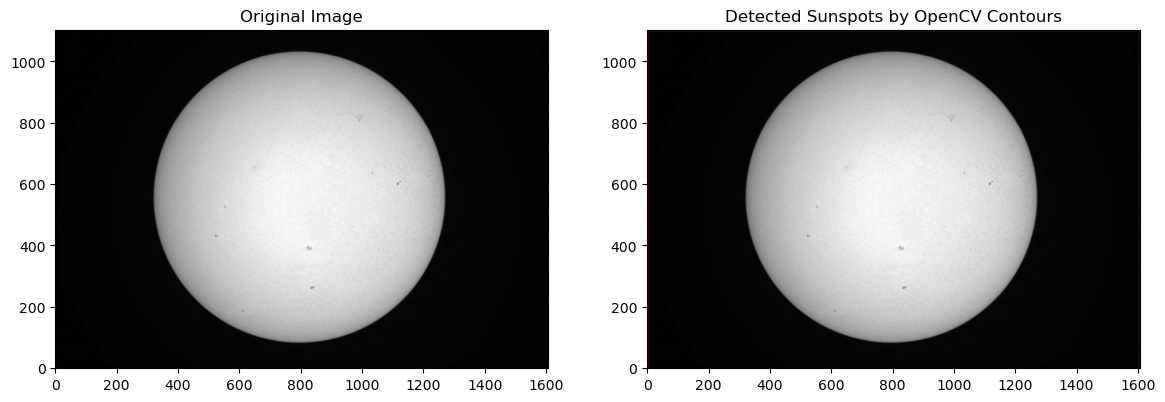

1

In [38]:
detect_sunspots_opencv_contours(fits_files[1], 'sun_stats', True)